In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

import os

In [3]:
save_path = ('figures/1b2_6')
if not os.path.isdir(save_path):
    os.makedirs(save_path)

In [4]:
NUM_CLASSES = 7

epochs = 300
batch_size = 8
num_neurons = 30
seed = 10

l_r = 0.001

In [5]:
histories={}

np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)

In [7]:
# Shuffle
idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

In [8]:
no_data= len(X_data)
print(0.7*(no_data))
print(0.3*(no_data))

280.0
120.0


In [9]:
# Normalize
# X ~ N(0,1)
X_data = ((X_data - np.mean(X_data, axis = 0))/ np.std(X_data, axis =0))

In [10]:
trainX = X_data[:280]
trainY = Y_data[:280]

testX = X_data[280:]
testY = Y_data[280:]

print(trainX[:2])
print(trainY[:2])
print(range(len(trainX[1])))
      

[[-0.76859003 -0.23259949 -0.07660001  0.0994422  -1.06145431 -0.65302852
   0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.59665321  0.61012728  0.13612981
   0.90911166]]
[[0.75]
 [0.69]]
range(0, 7)


[[-0.23259949 -0.07660001  0.0994422  -1.06145431 -0.65302852  0.90911166]
 [ 0.26229304  0.79882862  0.59665321  0.61012728  0.13612981  0.90911166]
 [-1.22238456 -0.95202863 -0.39776881  0.05293342 -0.90488756  0.90911166]
 ...
 [-0.39756367 -0.07660001  0.0994422  -1.06145431 -0.50191309 -1.09997489]
 [-1.22238456 -0.07660001 -1.39219083 -0.50426044  0.10254861  0.90911166]
 [-0.8924562  -0.07660001 -0.89497982 -1.06145431  0.13612981 -1.09997489]]
0


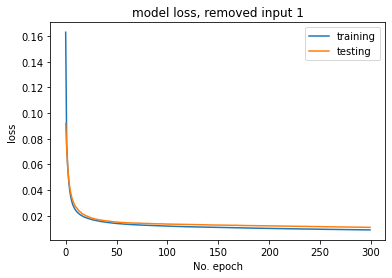

train m.s.e. = 0.009, test m.s.e. = 0.011
[[-0.76859003 -0.07660001  0.0994422  -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.79882862  0.59665321  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -0.95202863 -0.39776881  0.05293342 -0.90488756  0.90911166]
 ...
 [-0.24499762 -0.07660001  0.0994422  -1.06145431 -0.50191309 -1.09997489]
 [-1.46671326 -0.07660001 -1.39219083 -0.50426044  0.10254861  0.90911166]
 [-0.33226302 -0.07660001 -0.89497982 -1.06145431  0.13612981 -1.09997489]]
1


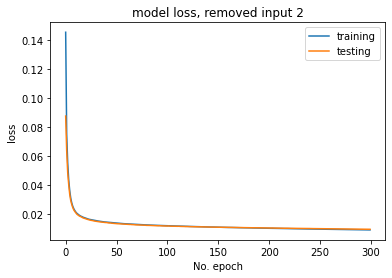

train m.s.e. = 0.009, test m.s.e. = 0.010
[[-0.76859003 -0.23259949  0.0994422  -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.59665321  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.39776881  0.05293342 -0.90488756  0.90911166]
 ...
 [-0.24499762 -0.39756367  0.0994422  -1.06145431 -0.50191309 -1.09997489]
 [-1.46671326 -1.22238456 -1.39219083 -0.50426044  0.10254861  0.90911166]
 [-0.33226302 -0.8924562  -0.89497982 -1.06145431  0.13612981 -1.09997489]]
2


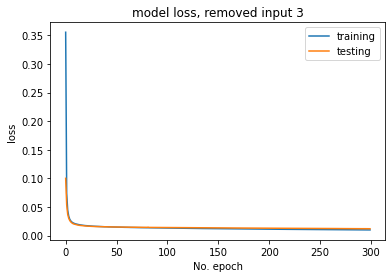

train m.s.e. = 0.010, test m.s.e. = 0.012
[[-0.76859003 -0.23259949 -0.07660001 -1.06145431 -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.61012728  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863  0.05293342 -0.90488756  0.90911166]
 ...
 [-0.24499762 -0.39756367 -0.07660001 -1.06145431 -0.50191309 -1.09997489]
 [-1.46671326 -1.22238456 -0.07660001 -0.50426044  0.10254861  0.90911166]
 [-0.33226302 -0.8924562  -0.07660001 -1.06145431  0.13612981 -1.09997489]]
3


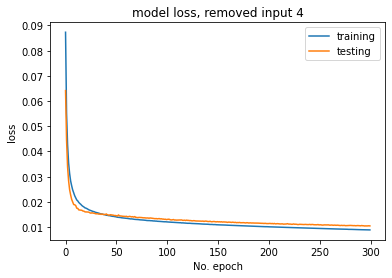

train m.s.e. = 0.009, test m.s.e. = 0.010
[[-0.76859003 -0.23259949 -0.07660001  0.0994422  -0.65302852  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.59665321  0.13612981  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863 -0.39776881 -0.90488756  0.90911166]
 ...
 [-0.24499762 -0.39756367 -0.07660001  0.0994422  -0.50191309 -1.09997489]
 [-1.46671326 -1.22238456 -0.07660001 -1.39219083  0.10254861  0.90911166]
 [-0.33226302 -0.8924562  -0.07660001 -0.89497982  0.13612981 -1.09997489]]
4


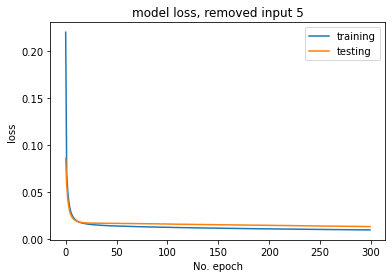

train m.s.e. = 0.009, test m.s.e. = 0.013
[[-0.76859003 -0.23259949 -0.07660001  0.0994422  -1.06145431  0.90911166]
 [ 0.3658602   0.26229304  0.79882862  0.59665321  0.61012728  0.90911166]
 [-1.20491705 -1.22238456 -0.95202863 -0.39776881  0.05293342  0.90911166]
 ...
 [-0.24499762 -0.39756367 -0.07660001  0.0994422  -1.06145431 -1.09997489]
 [-1.46671326 -1.22238456 -0.07660001 -1.39219083 -0.50426044  0.90911166]
 [-0.33226302 -0.8924562  -0.07660001 -0.89497982 -1.06145431 -1.09997489]]
5


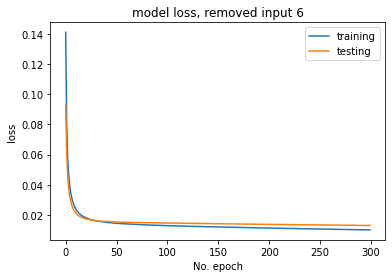

train m.s.e. = 0.010, test m.s.e. = 0.013
[[-0.76859003 -0.23259949 -0.07660001  0.0994422  -1.06145431 -0.65302852]
 [ 0.3658602   0.26229304  0.79882862  0.59665321  0.61012728  0.13612981]
 [-1.20491705 -1.22238456 -0.95202863 -0.39776881  0.05293342 -0.90488756]
 ...
 [-0.24499762 -0.39756367 -0.07660001  0.0994422  -1.06145431 -0.50191309]
 [-1.46671326 -1.22238456 -0.07660001 -1.39219083 -0.50426044  0.10254861]
 [-0.33226302 -0.8924562  -0.07660001 -0.89497982 -1.06145431  0.13612981]]
6


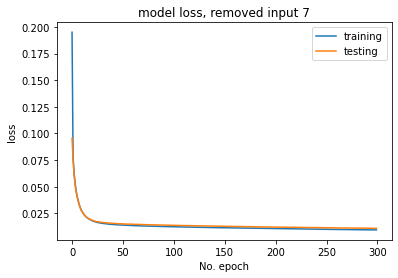

train m.s.e. = 0.010, test m.s.e. = 0.011


In [11]:
# iterate through all the index 
for d in range(len(X_data[1]-1)):
    x_d = X_data
    X_d = []
    # delete column i 
    for i in range(len(X_data)):
        x_d = np.delete(X_data[i],d)
        X_d.append(x_d)

    # Split data into testing and training with the input reduced
    X_d = np.array(X_d)
    x_train = X_d[:280]
    x_test = X_d[280:]
    
    print(X_d)
    print(d)
    starter_model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation='relu'),
        keras.layers.Dense(1, activation = 'linear')])
        
    starter_model.compile(optimizer='sgd',
                          loss=keras.losses.MeanSquaredError(),
                          metrics=['mse'])
        
    histories['starter'] =starter_model.fit(x_train, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        verbose = 0, 
                                        validation_data=(x_test, testY))
    
    
    plt.plot(histories['starter'].history['loss'], label='training')
    plt.plot(histories['starter'].history['val_loss'], label='testing')
    plt.ylabel('loss')
    plt.xlabel('No. epoch')
    plt.legend(loc="best")
    plt.title('model loss, removed input %d'%(d+1))
    plt.savefig('./%s/model_VS_e_input%d'%(save_path,d+1))
    plt.show()


    print('train m.s.e. = %3.3f, test m.s.e. = %3.3f'%(histories['starter'].history['loss'][-1], histories['starter'].history['val_loss'][-1]))
